In [1]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (5, 3) # set default figure size
import flopy as fp  # import flopy and call it fp
import glob
import imageio
import IPython
import datetime
import xarray as xr

### run varrying parameters in `vary_params.py` 
#### vary K & porosity

In [2]:
files = glob.glob(r'output/model_output_2024-02-01 19*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
# correct_arr = np.array([load_arr[:,0], load_arr[:,2],load_arr[:,4]]).T
# load_arr = correct_arr

using latest output\model_output_2024-02-01 19_24.txt


In [3]:
load_arr

array([[27.09677419, 31.12903226, 33.70967742, 35.80645161, 37.58064516,
        39.19354839, 40.64516129, 41.93548387, 43.06451613, 44.19354839],
       [21.93548387, 25.96774194, 29.19354839, 31.77419355, 34.03225806,
        35.96774194, 37.74193548, 39.35483871, 40.80645161, 41.93548387],
       [15.64516129, 20.32258065, 24.35483871, 27.58064516, 30.32258065,
        32.74193548, 34.83870968, 36.77419355, 38.5483871 , 40.        ],
       [ 6.93548387,  7.41935484,  7.90322581,  8.22580645,  8.70967742,
         9.03225806,  9.35483871,  9.67741935, 10.        , 10.32258065],
       [ 5.        ,  5.48387097,  5.96774194,  6.4516129 ,  6.77419355,
         7.09677419,  7.41935484,  7.74193548,  8.06451613,  8.38709677],
       [ 3.06451613,  3.5483871 ,  4.03225806,  4.35483871,  4.67741935,
         5.        ,  5.32258065,  5.64516129,  5.96774194,  6.29032258],
       [ 3.06451613,  3.22580645,  3.22580645,  3.38709677,  3.38709677,
         3.5483871 ,  3.5483871 ,  3.5483871 

In [4]:
# files = glob.glob(r'output/parameter_output_2024-01-08*.txt')
files = glob.glob(r'output/parameter_output_2024-02-01 19*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
n_kh_vals = 3
kh_var = load_params[:n_kh_vals]
npor_var = load_params[n_kh_vals:]

In [5]:
kh_var

array([10., 25., 40.])

In [6]:
npor_var

array([0.5 , 0.35, 0.2 ])

In [7]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1
n_years = 10
cycle_n = np.arange(0, n_years,1)
cycle_n_arr = np.array(cycle_n) + 1

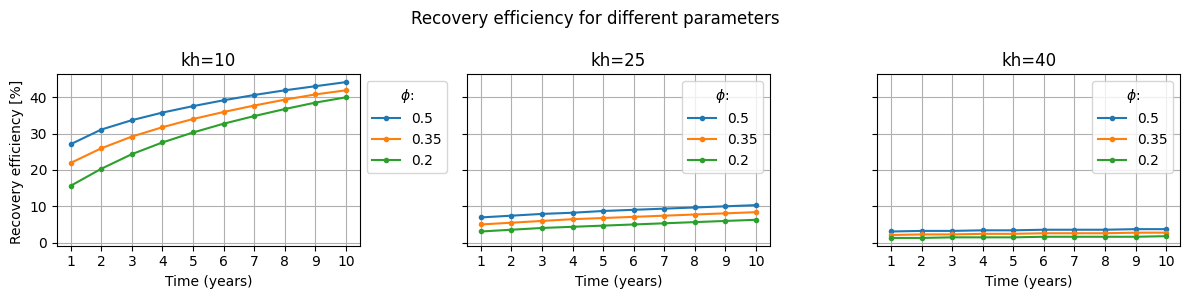

In [8]:
n = 0
fname = r'figures/recovery_Q_vary_k_npor.png'
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True, sharex=True)
fig.suptitle("Recovery efficiency for different parameters")
axs = ax.flatten()
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0]: axs[i].set_ylabel("Recovery efficiency [%] ")
    if i in [0,1,2]: axs[i].set_xlabel(r"Time (years)")
    axs[i].set_title(f"kh={int(kh_var[i])}")
    axs[i].set_xticks(ticks=cycle_n_arr)
    axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}")
        axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
        n+=1
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

#### vary alpha_L

In [9]:
files = glob.glob(r'output/model_alphaL_output_2024-01-31*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
load_arr[0,:]

IndexError: list index out of range

In [ ]:
files = glob.glob(r'output/parameter_alphaL_output_2024-01-31*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
alphaL_var = load_params[:]
alphaL_var

In [ ]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1.25
cycle_n = np.arange(0, 10,1)
cycle_n_arr = np.array(cycle_n) + 1

In [ ]:
n = 0
fname = r'figures/recovery_Q_vary_alpha_L.png'
fig, ax = plt.subplots(1,figsize=(5,3),sharey=True, sharex=True)
# fig.suptitle("Recovery volume for different parameters")
axs = [ax]
i = 0
axs[i].set_ylabel("Recovery efficiency [%]")
axs[i].set_xlabel(r"Time (years)")
axs[i].set_title(fr"kh=30,$\phi$=0.35")
axs[i].set_xticks(ticks=cycle_n_arr)
axs[i].grid()
for j in range(len(alphaL_var)):
    cycle_n_arr = np.array(cycle_n) + 1
    axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{alphaL_var[j]}")
    n+=1
axs[i].legend(bbox_to_anchor=(1,1),title=r"$\alpha_L:$")
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

# rerun with kh=40, npor=0.5
- for contour plots save large ds 

In [ ]:
# files = glob.glob(r'output/model_output_2024-01-31 10*.txt')
# load_arr = np.loadtxt(files[-1],delimiter=",")
# print(f'using latest {files[-1]}')
# load_arr[:]

In [ ]:
# # files = glob.glob(r'output/parameter_output_2024-01-08*.txt')
# files = glob.glob(r'output/parameter_output_2024-01-31 10*.txt')
# load_params = np.loadtxt(files[-1],delimiter=",")
# n_kh_vals = 1
# kh_var = load_params[:n_kh_vals]
# npor_var = load_params[n_kh_vals:]

In [ ]:
# kh_var

In [ ]:
# npor_var

In [ ]:
# n = 0
# fname = r'figures/recovery_Q_vary_k-40_npor-0.5.png'
# fig, ax = plt.subplots(1,len(kh_var),figsize=(5,3),sharey=True, sharex=True)
# fig.suptitle("Recovery efficiency for different parameters")
# axs = [ax]
# for i in range(len(kh_var)):
#     # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
#     if i in [0]: axs[i].set_ylabel("Recovery efficiency [%] ")
#     if i in [0,1,2]: axs[i].set_xlabel(r"Time (years)")
#     axs[i].set_title(f"kh={int(kh_var[i])}")
#     axs[i].set_xticks(ticks=cycle_n_arr)
#     axs[i].grid()
#     cycle_n_arr = np.array(cycle_n) + 1
#     for j in range(len(npor_var)):
#         if i in [0] and j in [2]: ls="--" 
#         else: ls = "-"
#         axs[i].plot(cycle_n_arr,load_arr,marker=".",label=f"{npor_var[j]}",ls=ls)
#         axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
#         n+=1
# fig.tight_layout()
# plt.savefig(fname,bbox_inches="tight")
#     # plt.close()

# Make nice contour plots

In [10]:
# params = [[40,0.2,0.5,nlay],
#           [30,0.35,0.5,10]] # ,[k3,npor3,alphaL3],[k2,npor2,alphaL2]]

k_lst = [10, 25, 40]
npor_lst = [0.2,0.35, 0.5]
params = [[k, npor, 0.5] for k in k_lst for npor in npor_lst]
ds_lst = []

In [11]:
nlay = 20
n_years = 10
for k, npor, alphaL in params:
    fname_in = fr'output/store_concentrations_k-{k}_npor-{npor}_alphaL-{alphaL}-nlay-{nlay}_nyears-{n_years}*.nc'
    files = glob.glob(fname_in)[-1]
    print(files)
    ds_lst.append(xr.open_dataarray(files))

output\store_concentrations_k-10_npor-0.2_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_42.nc
output\store_concentrations_k-10_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 19_17.nc
output\store_concentrations_k-10_npor-0.5_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_43.nc
output\store_concentrations_k-25_npor-0.2_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_38.nc
output\store_concentrations_k-25_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_36.nc
output\store_concentrations_k-25_npor-0.5_alphaL-0.5-nlay-20_nyears-10_2024-02-01 15_31.nc
output\store_concentrations_k-40_npor-0.2_alphaL-0.5-nlay-20_nyears-10_2024-02-01 18_54.nc
output\store_concentrations_k-40_npor-0.35_alphaL-0.5-nlay-20_nyears-10_2024-02-01 18_56.nc
output\store_concentrations_k-40_npor-0.5_alphaL-0.5-nlay-20_nyears-10_2024-02-01 18_57.nc


In [12]:
files = glob.glob(fname_in)
files

['output\\store_concentrations_k-40_npor-0.5_alphaL-0.5-nlay-20_nyears-10_2024-02-01 18_57.nc']

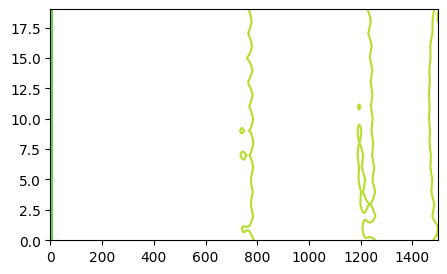

In [23]:
plt.contour(ds_lst[-1].isel(year=0,tstep=0).values)

In [40]:
time1 = "2024-02-01 19_48"
time2 = "2024-02-01 19_41"
r_300 = np.loadtxt(fr'output/model_radius_{time1}.txt')
r_200 = np.loadtxt(fr'output/model_radius_{time2}.txt')
zc = np.loadtxt(fr'output/model_z_{time}.txt')

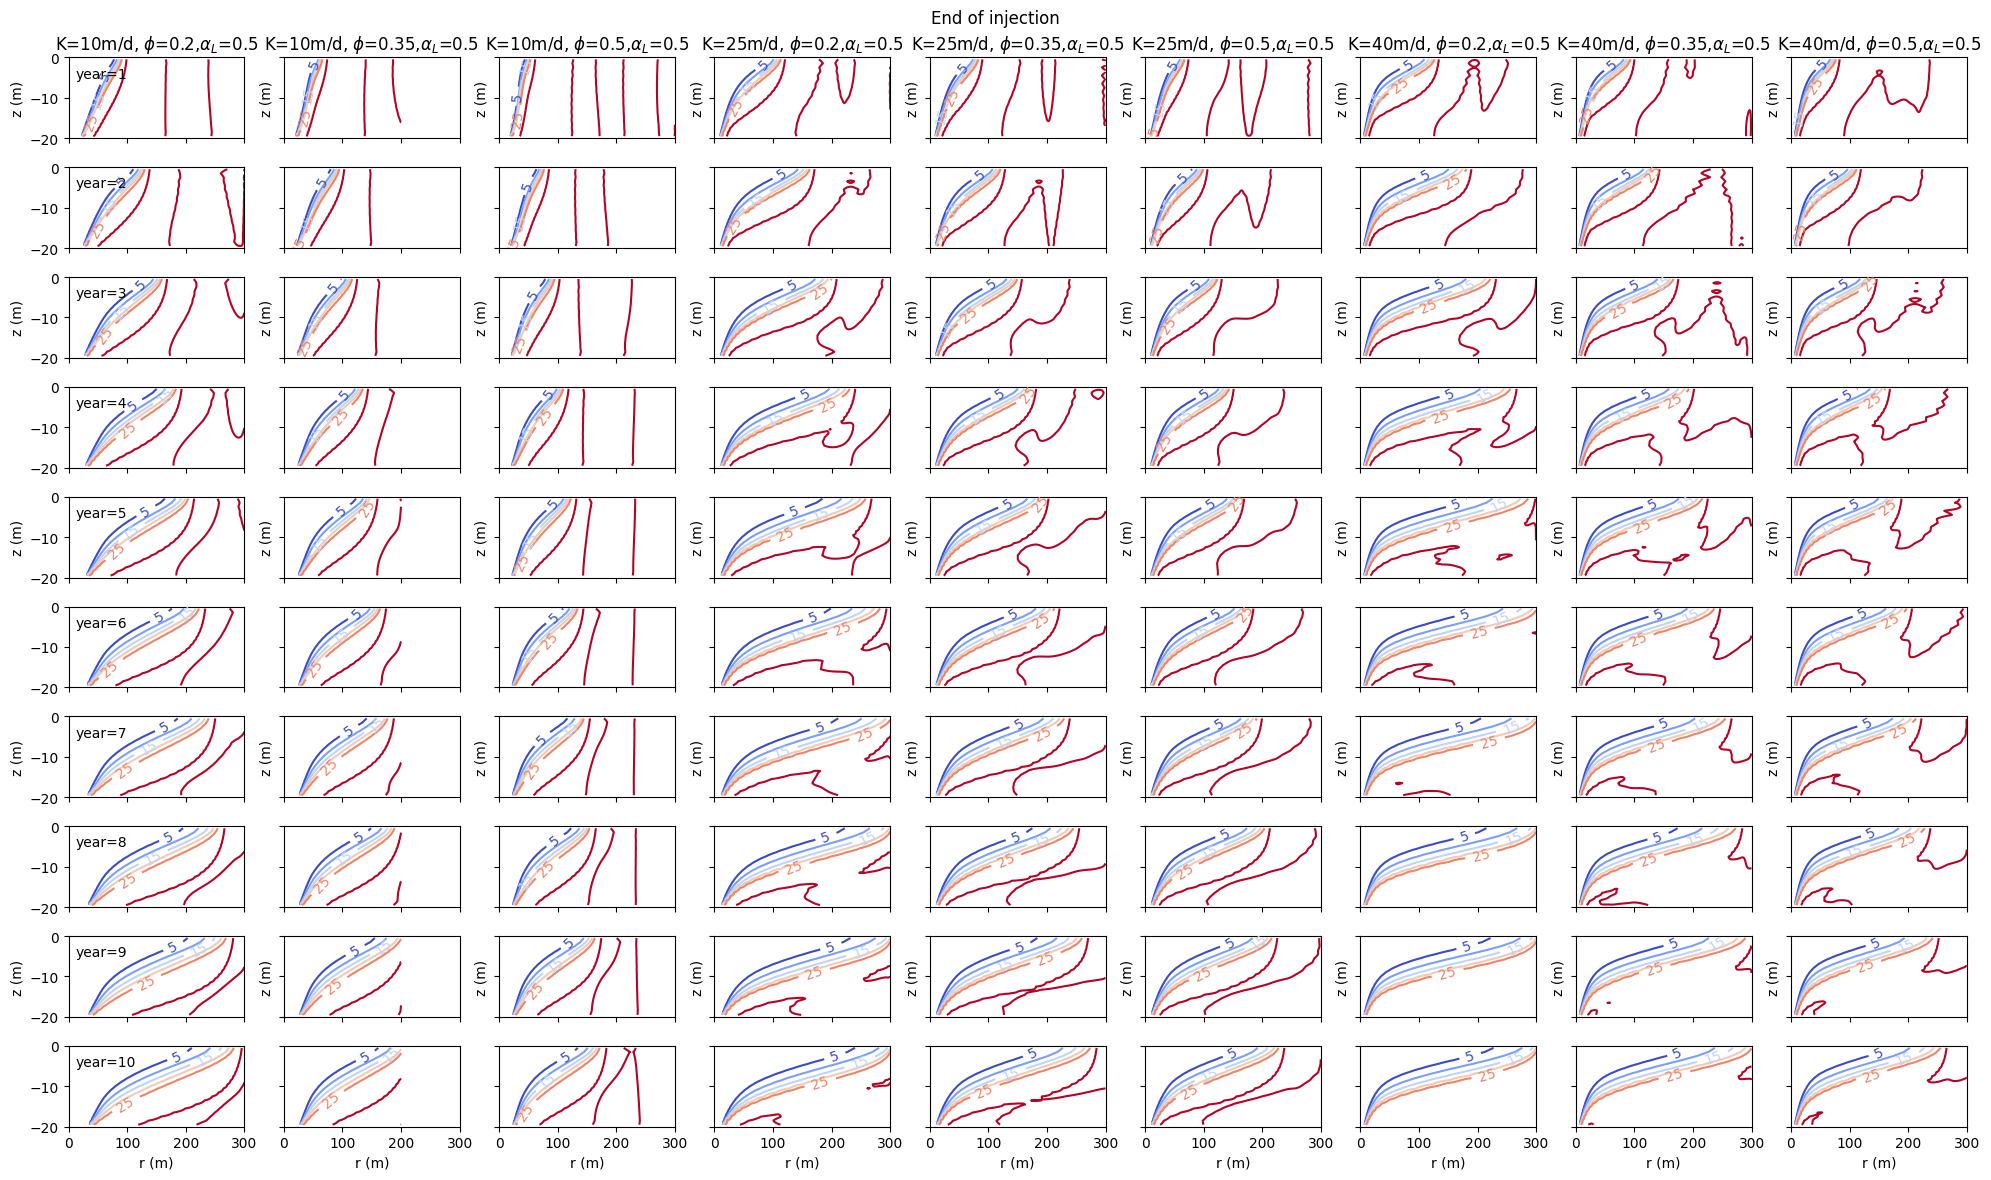

In [46]:
tstep = 3030
title = f'End of injection'

# tstep = 3649
# title = f'End of extraction'

n_years = 10
years = np.arange(0, n_years, 1)
fig, ax = plt.subplots(n_years, len(ds_lst),figsize=(20,12),sharex=True,sharey=True)
plt.suptitle(title)
for ds_index, ds in enumerate(ds_lst):
    for year in years:
        if len(ds_lst) > 1: axs = ax[year, ds_index]
        else: axs = ax[year]
        if ds_index == 1: r = r_200
        else: r = r_300
        axs.set_xlim((0, 300))
        axs.set_ylim((-20, 0))
        data = ds.isel(year=year,tstep=tstep)
        cls = axs.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
        axs.clabel(cls, cls.levels[::2], inline=True, fontsize=10)
        if year == 9: axs.set_xlabel("r (m)")
        if year % 2 == 0:  axs.set_ylabel("z (m)")
        if year == 0: 
            k,npor, alphaL = params[ds_index][0],params[ds_index][1],params[ds_index][2]
            axs.set_title(fr'K={k}m/d, $\phi$={npor},$\alpha_L$={alphaL}')
        if ds_index == 0:
            axs.annotate(f'year={year+1}',(12.5,-5))
plt.tight_layout()
plt.savefig(fr'figures/overview_flows_at_{title.replace(' ',"_")}')

In [44]:
from ipywidgets import interact
import warnings
warnings.simplefilter("ignore")
def contour(tstep,year,ds_index):
    ds_in = ds_lst[ds_index]
    data = ds_in.isel(year=year-1,tstep=tstep)
    plt.subplot(111, xlim=(0, 200), ylim=(-20, 0), xlabel='r (m)', ylabel='z (m)')
    cls = plt.contour(r, zc, data, np.arange(5, 35, 5), cmap='coolwarm')
    plt.clabel(cls, cls.levels[::2], inline=True, fontsize=10)
nstepin = 3030
nstepout = 3650-3030
interact(contour, tstep=(0, nstepin + nstepout - 1, 1),year=(1,n_years,1), ds_index=np.arange(len(ds_lst)));

interactive(children=(IntSlider(value=1824, description='tstep', max=3649), IntSlider(value=5, description='ye…